## 1 - Lien vers le drive ##




In [ ]:
from google.colab import drive

# autorisation avec un code
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2 - Import des librairies ##

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## 3 - Chargement de données ##


In [ ]:
file_path = "/content/drive/My Drive/Supervised_proj/creditcard.csv"
credit_card_data = pd.read_csv(file_path)
array = credit_card_data.to_numpy()
X = array[:,0:-1]
Y = array[:,-1]

# 4 - NearMiss

In [ ]:
%%capture
!pip install imblearn

In [ ]:
# Tune SVM
# Standardiser les données
scaler = StandardScaler()

# Utilisation d'une technique d'oversampling
near_miss = NearMiss()

num_folds = 10
seed = 2021

X_train, Y_train = near_miss.fit_resample(X, Y)
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
# Tune KNN
neighbors = list(range(1, 20))
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
# Tune RandomForestClassifier
n_estimators = [10, 20, 30, 40, 50, 100, 200]
param_grid = dict(n_estimators=n_estimators)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.931767 using {'n_estimators': 100}


In [ ]:
# fixer le seed
from random import seed
seed(2021)

scaler = StandardScaler()

num_folds = 10
seed = 2021

# Utilisation de RandomUnderSampler
near_miss = NearMiss()

kfold = KFold(n_splits=num_folds, random_state=seed)

# Nous avons choisi 10 modèles
models = {
    'KNN': KNeighborsClassifier(n_neighbors=8),
    'GBM': GradientBoostingClassifier(n_estimators=200),
    'LR': LogisticRegression(),
    'RF': RandomForestClassifier(n_estimators=100),
    'ET': ExtraTreesClassifier(n_estimators=200),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'CART': DecisionTreeClassifier(),
    'SVM': SVC(probability=True, kernel='linear', C=0.7),
    'AB': AdaBoostClassifier(n_estimators=100)
    }

results, names, result_str = list(), list(), list()
best_predictions = {}

for name, model in models.items():
    # Nom du modèle
    print(name)

    # Initialiser les résultats
    best_result = 0
    best_cv_results = list()
    y_probas_pred = list()
    
    # C'est parti pour 50 itérations
    iter_max = 50
    i = 1
    while i <= iter_max:
        # utilisation de near_miss
        X_train, Y_train = near_miss.fit_resample(X, Y)
        X_train = scaler.fit_transform(X_train)

        # Une cross validation
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        if cv_results.mean() > best_result:
            best_result = cv_results.mean()
            y_probas_pred = cross_val_predict(model,X_train, Y_train, cv=kfold, method="predict_proba")
            best_cv_results = cv_results 
        i+=1
        
    results.append(best_cv_results)
    names.append(name)
    to_add = f" model {name}, best CV = {best_cv_results.mean()} +- {best_cv_results.std()}"
    result_str.append(to_add)
    best_predictions[name] = y_probas_pred

# Show results
for string in result_str:
    print(string)

KNN
GBM
LR
RF
ET
LDA
QDA
CART
SVM
AB
 model KNN, best CV = 0.8990105132962276 +- 0.1152383496070411
 model GBM, best CV = 0.9398680684394971 +- 0.04736192844598384
 model LR, best CV = 0.9368686868686869 +- 0.03683688435912473
 model RF, best CV = 0.9521335807050093 +- 0.04057705626423251
 model ET, best CV = 0.9480107194392907 +- 0.047773609329297244
 model LDA, best CV = 0.8928983714697999 +- 0.10004099126962554
 model QDA, best CV = 0.9257060399917544 +- 0.049443786521359064
 model CART, best CV = 0.9297773654916514 +- 0.03222250998510085
 model SVM, best CV = 0.9409400123685838 +- 0.03681402881489442
 model AB, best CV = 0.9428777571634714 +- 0.05631562503811011


In [ ]:
for model in best_predictions.keys():
    print(model, ": ", roc_auc_score(Y_train, best_predictions[model][:,1]))

KNN :  0.9359694130477889
GBM :  0.9651249256395001
LR :  0.9692478022341199
RF :  0.9761468041509683
ET :  0.9766693932183225
LDA :  0.9335960737656156
QDA :  0.9646044021415824
CART :  0.9288617886178862
SVM :  0.9658106946923127
AB :  0.9584118249719082


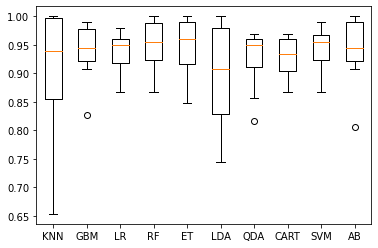

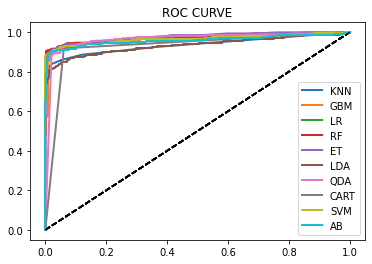

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig("boxplot_nearmiss_HD.png", format="png", dpi=1200)
plt.show()
for model in best_predictions.keys():
  fpr, tpr, thresh = roc_curve(Y_train, best_predictions[model][:,1])
  plt.plot(fpr, tpr, linewidth=2, label=model)
  plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.title('ROC CURVE')
plt.savefig("roc_nearmiss_HD.png", format="png", dpi=1200)

# 5 - RandomUnderSampling

In [ ]:
# fixer le seed
from random import seed
seed(2021)

scaler = StandardScaler()

num_folds = 10
seed = 2021

# Utilisation de RandomUnderSampler
random_under_sampler = RandomUnderSampler()

kfold = KFold(n_splits=num_folds, random_state=seed)

# Nous avons choisi 10 modèles
models = {
    'KNN': KNeighborsClassifier(n_neighbors=8),
    'GBM': GradientBoostingClassifier(n_estimators=200),
    'LR': LogisticRegression(),
    'RF': RandomForestClassifier(n_estimators=100),
    'ET': ExtraTreesClassifier(n_estimators=200),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'CART': DecisionTreeClassifier(),
    'SVM': SVC(probability=True, kernel='linear', C=0.7),
    'AB': AdaBoostClassifier(n_estimators=100)
    }

results, names, result_str = list(), list(), list()
best_predictions = {}

for name, model in models.items():
    # Nom du modèle
    print(name)

    # Initialiser les résultats
    best_result = 0
    best_cv_results = list()
    y_probas_pred = list()
    
    # C'est parti pour 50 itérations
    iter_max = 50
    i = 1
    while i <= iter_max:
        # utilisation de random_under_sampler
        X_train, Y_train = random_under_sampler.fit_resample(X, Y)
        X_train = scaler.fit_transform(X_train)

        # Une cross validation
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        if cv_results.mean() > best_result:
            best_result = cv_results.mean()
            y_probas_pred = cross_val_predict(model,X_train, Y_train, cv=kfold, method="predict_proba")
            best_cv_results = cv_results 
        i+=1
        
    results.append(best_cv_results)
    names.append(name)
    to_add = f" model {name}, best CV = {best_cv_results.mean()} +- {best_cv_results.std()}"
    result_str.append(to_add)
    best_predictions[name] = y_probas_pred

# Show results
for string in result_str:
    print(string)

KNN
GBM
LR
RF
ET
LDA
QDA
CART
SVM
AB
 model KNN, best CV = 0.8949804164089878 +- 0.10231197612756107
 model GBM, best CV = 0.9368686868686869 +- 0.047190966175840704
 model LR, best CV = 0.940909090909091 +- 0.049148350782941844
 model RF, best CV = 0.9357864357864358 +- 0.05046311032328964
 model ET, best CV = 0.936775922490208 +- 0.05984326736254821
 model LDA, best CV = 0.8816738816738818 +- 0.11395801279979417
 model QDA, best CV = 0.9267882910740053 +- 0.034686627184062166
 model CART, best CV = 0.9155534941249227 +- 0.04791141426124404
 model SVM, best CV = 0.9388785817357246 +- 0.04748218075361375
 model AB, best CV = 0.9267264481550196 +- 0.057223945200953114


In [ ]:
for model in best_predictions.keys():
    print(model, ": ", roc_auc_score(Y_train, best_predictions[model][:,1]))

KNN :  0.9350130543988366
GBM :  0.9659924648026966
LR :  0.9652447286667988
RF :  0.9665419062727212
ET :  0.9682583944741886
LDA :  0.9214009518143962
QDA :  0.9631192577169675
CART :  0.9044715447154472
SVM :  0.9626131932051029
AB :  0.9569700575054532


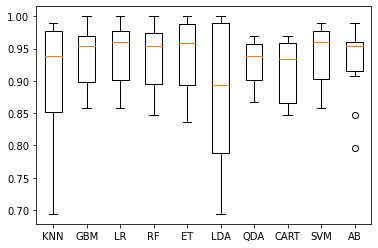

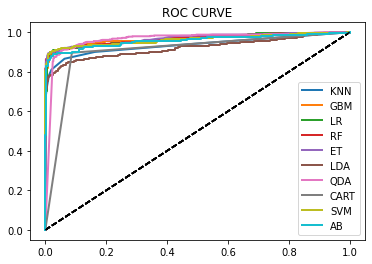

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig("boxplot_random_HD.png", format="png", dpi=1200)
plt.show()
for model in best_predictions.keys():
  fpr, tpr, thresh = roc_curve(Y_train, best_predictions[model][:,1])
  plt.plot(fpr, tpr, linewidth=2, label=model)
  plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.title('ROC CURVE')
plt.savefig("roc_random_HD.png", format="png", dpi=1200)